# GRO620 - Activité procédurale 2

Dans cette activité procédurale, nous allons poser les bases dufiltrage numérique d'images. Vous reconnaîtrez des éléments du filtrage numérique que vous avez vu en S4.

Pour chaque question impliqant de la programmation, commencez par discuter de la procédure à suivre pour résoudre le problème. Nous validerons l'approche en classe avant de se lancer dans l'implémentation.

In [4]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données. 
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/gro620-e21

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive


## Encodage de l'image

Pour les questions suivantes, vous aurez probablement besoin de lire la documentation de cv2.imread et matplotlib.pyplot.imshow :

[imread](https://pythonexamples.org/python-opencv-read-image-cv2-imread/)

[imshow](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html)

Le code suivant charge une image et l'affiche en ligne :

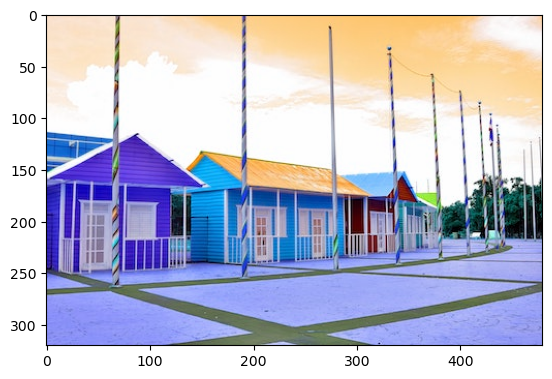

In [5]:
img_color = cv2.imread("images_doc/proc1-q3-color.jpeg")
plt.imshow(img_color)

(source de l'image: [PixaBay, Pexels](https://www.pexels.com/photo/apartment-architecture-block-blue-534124/))

### Q1.1

**a)** Ouvrez directement l'image dans un autre logiciel (le fichier se trouve dans images_doc/proc1-q3-color.jpeg) et comparez le résultat. Que remarquez vous ?

Les couleurs sont inversés 

**b)** Affichez seulement le premier canal de couleurs de l'image. Pensez à analyser la composition de la matrice image que OpenCV vous retourne. Expliquez ensuite ce que vous voyez.

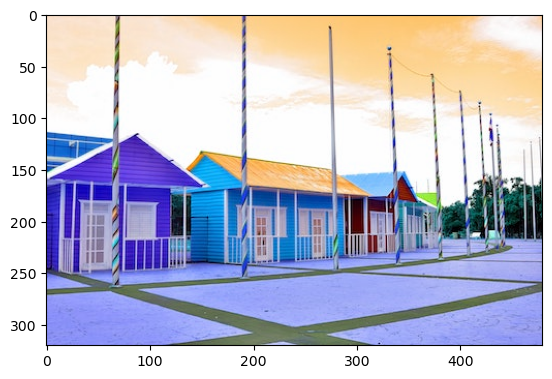

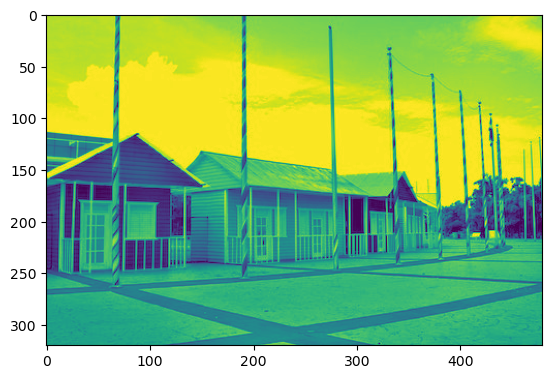

In [6]:
plt.imshow(img_color)              # Image originale
plt.figure()                       # Permet d'afficher plus d'une image dans la même cellule
img_gray = img_color[:,:,1]
plt.imshow(img_gray) # Le paramètre cmap n'a pas d'effet sur une image à plus d'un canal.

**c)** Transformez maintenant l'image pour que les couleurs correspondent à ce que vous voyez en dehors de Jupyter.

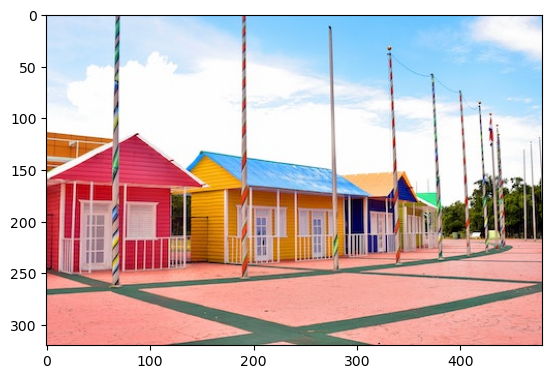

In [7]:
img_correcte = img_color.copy() # Permet de forcer une copie de l'image.
                                # img_correcte = img_color aurait modifié l'originale.

# # Split the image into individual color channels
# b, g, r = cv2.split(img_correcte)

# # Invert the green and blue channels using the bitwise NOT operation
# r_inverted = cv2.bitwise_not(r)
# b_inverted = cv2.bitwise_not(b)

# # Merge the inverted green and blue channels with the original red channel
# inverted_image = cv2.merge((r, g, b))

# # Display the inverted image
# cv2.imshow('Inverted Image', inverted_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # If you want to save the inverted image:
# cv2.imwrite('inverted_image.jpg', inverted_image)        

#Réponse 1:
# img_correcte = cv2.cvtColor(img_correcte, cv2.COLOR_BGR2RGB)
# plt.imshow(img_correcte)

#Réponse 2:
img_correcte[:,:,0] = img_color[:,:,2]
img_correcte[:,:,2] = img_color[:,:,0]
plt.imshow(img_correcte)

### Q1.2

Soit cette couleur dans l'espace Y'CbCr (on suppose chaque valeur comme étant encodée sur 8 bits) :

$c = [100, 150, 150]$

Trouvez sa valeur équivalente dans l'espace RGB.

In [8]:
c = np.array([100,150,150])
# Read the image in YCbCr color space
# c = c.reshape(1,1,3)
# # c = c.astype(np.uint8)
# image_ycbcr = cv2.imread(c, cv2.IMREAD_COLOR)

# Convert YCbCr image to RGB color space
# image_rgb = cv2.cvtColor(image_ycbcr, cv2.COLOR_YCrCb2BGR)

# Display the RGB image
# cv2.imshow('RGB Image', image_rgb)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # # If you want to save the RGB image:
# # cv2.imwrite('rgb_image.jpg', image_rgb)

#Réponse 1 : 
c = c.reshape(1,1,3)
c = c.astype(np.uint8)

cRGB = cv2.cvtColor(c, cv2.COLOR_YCrCb2RGB)
cRGB = cRGB.reshape(3)
print(cRGB)

#Réponse 2 :
#Équation 2.116, p.97



[131  77 139]


## Filtrage point à point

### Q2.1

Soit cette image (chargée par OpenCV et affichée par matplotlib): 

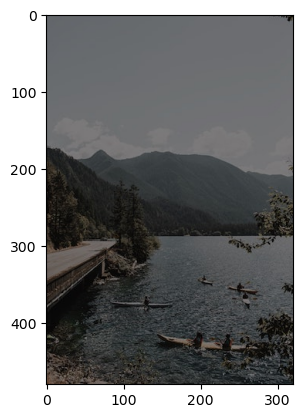

In [12]:
img_q31_org = cv2.imread("images_doc/proc2-q1-dock.jpeg")
img_q31_rgb = cv2.cvtColor(img_q31_org, cv2.COLOR_BGR2RGB) # Équivalent de la question Q3.1.c de l'activité procédurale 1.
plt.imshow(img_q31_rgb)

(Source de l'image originale : [Vlada Karpovich, Pexels](https://www.pexels.com/photo/snow-wood-landscape-mountains-4450090/))

Cette fonction affiche l'histogramme des trois composantes de l'image :

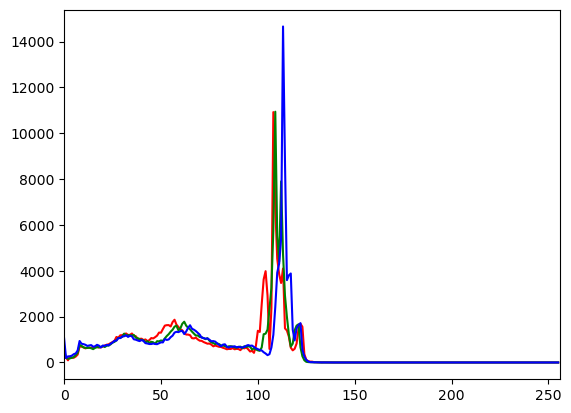

In [13]:
channels = ('r','g','b')
for i, col in enumerate(channels):
    hist = cv2.calcHist([img_q31_rgb], [i], None, [256], [0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])

Ajustez la plage dynamique en luminosité de l'image pour qu'elle couvre l'ensemble des valeurs possibles.

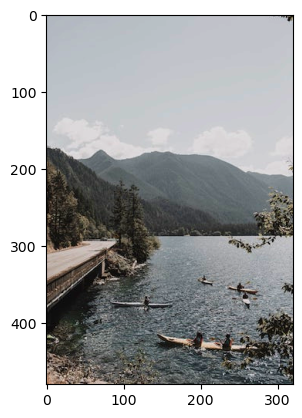

In [14]:
# NOTE: On convertit d'abord en float32 dans la plage [0,1] pour
# simplifier la manipulation des images avec des facteurs non-entiers.
# Matplotlib détecte ceci et affichera l'image correctement.
img_q31_f = np.float32(img_q31_rgb) / 255.0

img_q31_out = img_q31_f.copy() # À remplacer !
img_q31_out = cv2.normalize(img_q31_out, None, 0, 1, cv2.NORM_MINMAX)

# # Convert the image back to uint8 format for plotting the histogram
# img_q31_out_uint8 = np.uint8(img_q31_out * 255.0)

# # Calculate the histogram of the adjusted image
# hist_adjusted = cv2.calcHist([img_q31_out_uint8], channels=[0, 1, 2], mask=None, histSize=[256, 256, 256], ranges=[0, 256, 0, 256, 0, 256])

# # Plot the histogram of the adjusted image
# plt.figure()
# plt.title("Histogram of Adjusted Image")
# plt.xlabel("Pixel Value")
# plt.ylabel("Frequency")
# plt.plot(hist_adjusted)
# plt.show()

plt.imshow(img_q31_out)

#Réponse 1 : 
#Utiliser la fonction equalization de OpenCV

#Réponse 2 : 
#On multiplie par 2 tout les élément de la matrice


## Q2.2

Soit maintenant cette image :

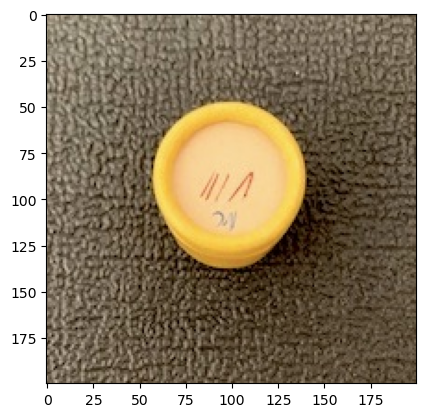

In [46]:
img_q32_org = cv2.imread("images_doc/proc2-q1-object.jpeg")
img_q32_rgb = cv2.cvtColor(img_q32_org, cv2.COLOR_BGR2RGB) # Équivalent de la question Q3.1.c de l'activité procédurale 1.
plt.imshow(img_q32_rgb)

Tentez de mettre en place un algorithme basé sur la luminosité permettant d'éliminer l'arrière-plan de cette image pour qu'il ne reste que l'objet en jaune sur un fond le plus noir possible.

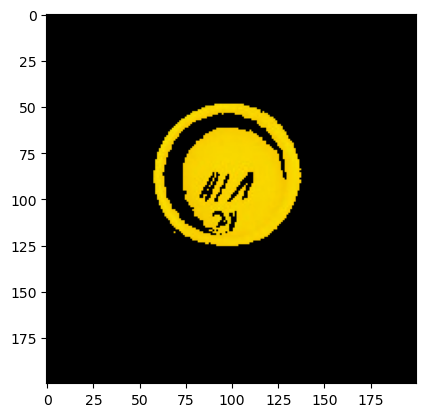

In [50]:
img_q32_filt = img_q32_rgb.copy()
W = img_q32_filt.shape[1] # NOTE: L'ordre des dimensions est Y puis X ("row-major")
H = img_q32_filt.shape[0]

img_q32_filt[:,:,2] = 0
max = 200

for i in range(W):
    for j in range(H):
        if img_q32_filt[i,j,0]<max or img_q32_filt[i,j,1]<max:
            img_q32_filt[i,j,0] = 0
            img_q32_filt[i,j,1] = 0
            
plt.imshow(img_q32_filt)

#Réponse 1:
#On peut utiliser la fonction cvtTreshold et Gaussian blur


## Filtrage linéaire

### Q3.1 

Soit l'image suivante ainsi que sa transformée de Fourier :

(<Axes: >, <matplotlib.image.AxesImage at 0x2a32f95f640>)

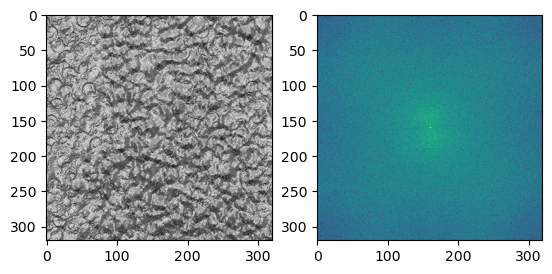

In [16]:
img_q4_org  = cv2.imread("images_doc/proc2-q2-texture.jpeg")
img_q4_mono = np.float32(cv2.cvtColor(img_q4_org, cv2.COLOR_BGR2GRAY)) / 255.0

def get_fft_mag(img):
    img_fft = np.fft.fft2(img)
    img_fft = np.fft.fftshift(img_fft)
    img_fft = 20*np.log(np.abs(img_fft))
    return img_fft
    
img_q4_fft = get_fft_mag(img_q4_mono)

plt.subplot(121),plt.imshow(img_q4_mono, cmap="gray")
plt.subplot(122),plt.imshow(img_q4_fft)

(Source de l'image originale : [Hoang Le, Pexels](https://www.pexels.com/photo/black-and-white-black-and-white-pattern-rough-978462/)).

**a)** Filtrez cette image à l'aide d'une convolution de façon à ce que la valeur de chaque pixel soit la valeur moyenne de ses voisins dans un carré de 15x15.

(<Axes: >, <matplotlib.image.AxesImage at 0x2a334241ae0>)

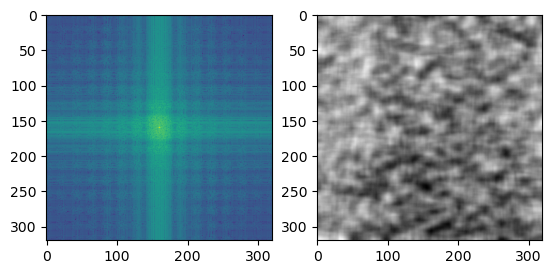

In [23]:
filter_kernel = np.ones((15,15))/15.0**2

#Réponse:
#Ca correspond au "box filter"
# On peut utiliser cv2.filter2D et ensuite on getfft de cette image, -1 dit de garder le format de pixel
# Le but du filtre est de flouté les changement de luminosité intense (haute fréquence)
# pour garder les point d'importance

smoothed_image = cv2.filter2D(img_q4_mono, -1, filter_kernel)
img_fft = get_fft_mag(smoothed_image)

plt.subplot(121),plt.imshow(img_fft)
plt.subplot(122),plt.imshow(smoothed_image, cmap="gray")






**b)** Comparez le résultat avec celui de la fonction cv2.GaussianBlur() avec un noyau de convolution de la même taille.

(<Axes: >, <matplotlib.image.AxesImage at 0x2a33319da50>)

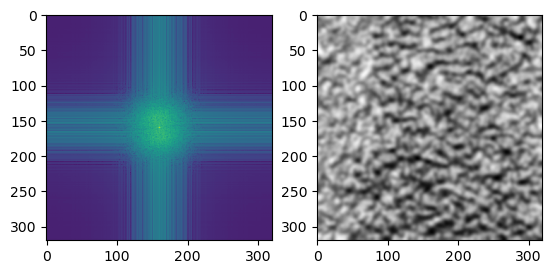

In [22]:
img_q4_blur = img_q4_mono.copy()
img_q4_blur_g = cv2.GaussianBlur(img_q4_blur, (15,15), 0)
img_q4_blur_fft = get_fft_mag(img_q4_blur_g)

plt.subplot(121),plt.imshow(img_q4_blur_fft)
plt.subplot(122),plt.imshow(img_q4_blur_g, cmap="gray")



**c)** Comment expliquez-vous la différence ?
La box fait des filtre avec un quadrillé, donc plus saccadé
Le gaussian filtre plus doucement

*(réponse ici)*

## Filtrage morphologique et chaîne de traitement

### Q4.1 

À partir de l'image de la question Q1.2, combinez les filtres vus plus tôt pour ne conserver que le contour de l'objet de la figure (donc sans bruit de fond).

In [15]:
img_q32_clean = img_q32_rgb.copy()